14.80142786070299

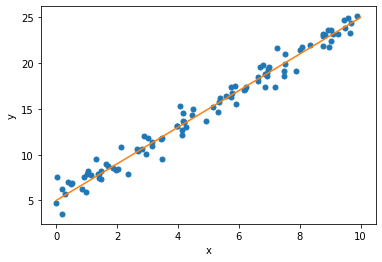

In [4]:
# statical learing can divided into supervised learning and Unsupervised learning

#Regression- Continuous outputs
#Classification- Catagorical output

#quanitvative - Numerical value 
#qualitative - Values in a category

#Least squares loss is used to estimate the expected value of outputs, whereas  0−1  loss is used to estimate the probability of outputs.

import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

n= 100
beta_0 = 5
beta_1 = 2

np.random.seed(1)

x = ss.uniform.rvs(size=n) * 10
y = beta_0 + beta_1 * x + ss.norm.rvs(loc = 0, scale=1, size =n)

plt.figure()
plt.plot(x, y, "o", ms=5)
xx = np.array([0,10])
plt.plot(xx, beta_0 + beta_1 * xx)
plt.xlabel("x")
plt.ylabel("y")

x.mean()
y.mean()

In [5]:
#simple linear regression

def compute_rss(y_estimate, y):
  return sum(np.power(y-y_estimate, 2))
def estimate_y(x, b_0, b_1):
  return b_0 + b_1 * x
rss = compute_rss(estimate_y(x, beta_0, beta_1), y)
rss

81.540007425512

1200
Estimate for the slope:  1.9999999999997442


Text(0, 0.5, 'RSS')

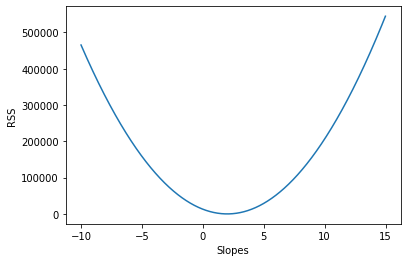

In [6]:
#least square esitmation in code

rss = []
slopes=np.arange(-10,15,0.01)
for slope in slopes:
    rss.append(np.sum((y - beta_0 - slope*x )**2))
    
ind_min = np.argmin(rss)
print(ind_min)

print("Estimate for the slope: " , slopes[ind_min])

plt.figure()
plt.plot(slopes,rss)
plt.xlabel("Slopes")
plt.ylabel("RSS")


In [7]:
#simple lineear regression in code

import statsmodels.api as sm

mod = sm.OLS(y,x)
est= mod.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.967
Method:                 Least Squares   F-statistic:                              2974.
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                    1.14e-75
Time:                        01:13:14   Log-Likelihood:                         -246.89
No. Observations:                 100   AIC:                                      495.8
Df Residuals:                      99   BIC:                                      498.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [8]:
X= sm.add_constant(x)
mod = sm.OLS(y,X)
est= mod.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4115.
Date:                Mon, 22 Jun 2020   Prob (F-statistic):           7.47e-82
Time:                        01:13:17   Log-Likelihood:                -130.72
No. Observations:                 100   AIC:                             265.4
Df Residuals:                      98   BIC:                             270.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2370      0.174     30.041      0.0

Text(0.5, 0, '$y$')

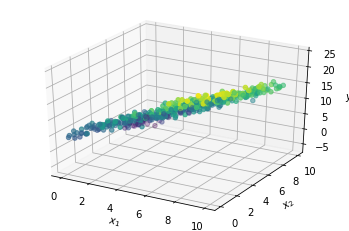

In [13]:
n =500
beta_0 = 5
beta_1 = 2
beta_2 =-1
np.random.seed(1)
x_1 = 10 * ss.uniform.rvs(size = n)
x_2 = 10 * ss.uniform.rvs(size = n)
y= beta_0 + beta_1 * x_1 + beta_2 * x_2 + ss.norm.rvs(loc = 0, scale=1, size =n)

X=np.stack([x_1, x_2], axis=1)

from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure()
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(X[:,0], X[:,1], y, c=y)
ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_zlabel("$y$")

In [19]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept =True)

lm.fit(X, y)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

print(lm.intercept_)
print(lm.coef_[0])
print(lm.coef_[1])

X_0 = np.array([2, 4])

print(lm.predict(X_0.reshape(1,-1)))

print(lm.score(X, y))

5.15407776377725
1.9999378989891403
-1.0202644869933355
[5.07289561]
0.9798997316600129


In [22]:
#mean sqaure error (MSE)
#training and test dataset
#underfitting and overfitting problems

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state =1)

lm = LinearRegression(fit_intercept=True, n_jobs=1)

print(lm.fit(X_train, y_train))

print(lm.score(X_test, y_test))



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
0.9794930834681773
